# 혼공머신 03_3. 특성 공학과 규제

## 다중 회귀
- 여러 개의 특성을 사용한 선형 회귀, 특성이 많은 고차원에서 선형 회귀가 매우 복잡한 모델을 표현할 수 있다. 특성이 많을수록 선형 모델의 성능은 좋아진다.
- 특성 공학 : 각 특성을 서로 곱해서 또 다른 특성을 만드는 등 기존의 특성을 사용해 새로운 특성을 만드는 작업

## 데이터 준비
- 농어의 특성이 3개(길이, 높이, 두께)일 때, 판다스(pandas)라는 데이터 분석 라이브러리를 사용하여 데이터프레임(dataframe) 구조를 다룰 수 있다. 데이터프레임은 넘파이 배열처럼 다차원 배열을 다룰 수도 있고, 넘파이 배열로 쉽게 변환할 수도 있다.
- read_csv() 매개변수  
  - sep : 파일의 구분자 지정. default는 콤마(,).
  - header : 데이터프레임의 열 이름으로 사용할 csv 파일의 행 번호 지정. 기본적으로는 첫 번째 행을 열 이름으로 사용.
  - skiprows : 파일에서 읽기 전에 건너뛸 행의 개수 지정.
  - nrows : 파일에서 읽을 행의 개수 지정.
- pandas dataframe을 만들기 위해 CSV 파일을 많이 이용한다.

In [ ]:
# 파일 불러오기(feature data)
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()   # 넘파이 배열로 바꾸기
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
# target data 준비
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

## 사이킷런 변환기(transfomer)
- 특성을 만들거나 전처리를 하기 위한 클래스. 공통적으로 fit(), transform() 메서드를 제공한다.
- PolynomialFeatures() : 새로운 특성을 만드는 클래스.  
degree : 최고 차수 지정(default는 2) / include_bias=False : 절편을 위한 특성 제거(default는 True) / interaction_only=Ture : 거듭제곱 항은 제외되고 특성 간 곱셈 항만 추가(default는 False)
- fit() : 새롭게 만들 특성 조합을 찾는다. input data를 변환할 때 target data는 필요하지 않으므로 input data만 전달한다.
- transform() : 실제로 데이터를 변환한다.

In [ ]:
# PolynomialFeatures 클래스 사용
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 예시 1
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 예시 2
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


- 무게 = a x 길이 + b x 높이 + c x 두께 + d x 1  
선형방정식은 위와 같은 식으로 이루어져 있어 예시 1에서는 1이 추가되었다. 이때, 특성은 (길이, 높이, 두께, 1)이 되는데, 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다. 따라서 include_bias=False로 지정하여 절편을 위한 특성을 추가하지 않는다.  
참고 : include_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다.

In [ ]:
# train set 변환
poly = PolynomialFeatures(include_bias= False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
# 9개의 특성의 조합 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# test set 변환
test_poly = poly.transform(test_input)

- test set을 따로 변환해도 상관없지만, train set을 기준으로 test set을 변환하는 것이 좋다.

## 다중 회귀 모델 훈련하기

In [ ]:
# train_poly를 사용해 모델 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
lr.score(train_poly, train_target)

0.9903183436982125

In [ ]:
lr.score(test_poly, test_target)

0.9714559911594111

- test set에 대한 점수는 높아지지 않았지만 underfitting 문제는 해결되었다.

In [ ]:
# 특성 더 추가
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target) # 훈련
print("train set score:", lr.score(train_poly, train_target))
print("test set score:", lr.score(test_poly, test_target))

train set score: 0.9999999999996433
test set score: -144.40579436844948


- 특성의 개수를 늘리면 선형 모델은 강력해져서 train data에 대해서는 거의 완벽하게 학습할 수 있지만 overfitting이 발생할 가능성이 높아진다.  
test set score가 음수가 나온 것은 overfitting이 발생한 것이다.

## 규제(Regularization)
- 머신러닝 모델이 overfitting이 발생하지 않도록 하는 것이다.  
선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만든다.
- 특성의 스케일이 정규화되지 않으면 계수 값의 차이가 커지게 되고, 계수 값의 크기가 많이 다르면 선형 회귀 모델에 규제를 적용할 때 공정하게 제어되지 않는다. → 스케일링 필요(StandardScaler() : 표준점수 변환)

In [ ]:
# StandardScaler 클래스를 이용하여 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀
- 규제가 있는 선형 회귀 모델로, 선형 모델의 계수를 작게 만들어 overfitting을 완화시킨다.
- 계수를 제곱한 값을 기준으로 규제를 적용한다.
- 매개변수  
  - alpha : 규제의 강도 조절(값이 클수록 규제가 강해짐). default는 1.
  - solver : 최적의 모델을 찾기 위한 방법 지정. default는 auto이며, 데이터에 따라 자동으로 선택된다. sag(사이킷런 0.17)는 확률적 평균 경사하강법 알고리즘으로 특성과 샘플 수가 많을 때 성능이 빠르고 좋다. saga(사이킷런 0.19)는 sag의 개선 버전이다.
  - random_state : solver=sag or saga → 넘파이 난수 시드값 지정 가능.

In [ ]:
# 릿지 모델 훈련
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("ridge train set score:", ridge.score(train_scaled, train_target))
print("ridge test set score:", ridge.score(test_scaled, test_target))

ridge train set score: 0.9896101671037343
ridge test set score: 0.9790693977615387


- 많은 특성을 사용했음에도 overfitting이 일어나지 않았다.
- 규제 양 조절 가능 → alpha(값이 커질수록 규제 강도가 세져 계수 값을 줄이게 되고, underfitting 되도록 유도한다. 값이 작아질수록 계수에 영향을 덜 미치게 되고, overfitting 가능성이 커진다.
- 적절한 alpha 값 찾기 : R^2의 그래프를 그려 train set과 test set의 점수가 가장 가까운 지점을 찾는다.

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)             # 릿지 모델 만들기
  ridge.fit(train_scaled, train_target)  # 훈련
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

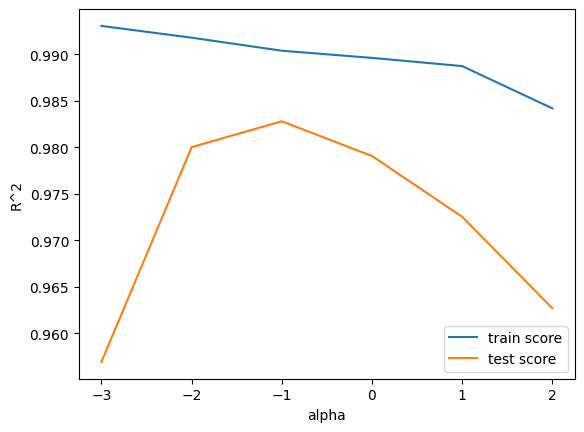

In [ ]:
# 그래프
plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(loc='lower right')
plt.show()

- x축은 alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현한다.  
참고 : 넘파이 로그 함수는 np.log()와 np.log10()이 있는데, 전자는 자연 상수 e를 밑으로 하는 자연로그이고, 후자는 10을 밑으로 하는 상용로그이다.
- train set과 test set이 가장 가까운 -1, 즉 0.1이 최적의 alpha 값이 된다.

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("ridge train set score:", ridge.score(train_scaled, train_target))
print("riege test set score:", ridge.score(test_scaled, test_target))

ridge train set score: 0.9903815817570367
riege test set score: 0.9827976465386928


- train set과 test set 점수가 비슷하게 높고 overfitting과 underfitting 사이에서 균형을 잘 맞추고 있다.

## 라쏘 회귀
- 규제가 있는 선형 회귀 모델로, 계수 값을 0으로 만들 수 있다.
- 계수의 절대값을 기준으로 규제를 적용한다.
- 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행하는 좌표 하강법(coordinate descent)를 사용한다.
- 매개변수  
 - alpha
 - random_state
 - max_iter : 알고리즘 수행 반복 횟수 지정. default는 1000.

In [ ]:
# 라쏘 모델 훈련
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("lasso train set score:", lasso.score(train_scaled, train_target))
print("lasso test set score:", lasso.score(test_scaled, test_target))

lasso train set score: 0.989789897208096
lasso test set score: 0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)   # 라쏘 모델 만들기
  lasso.fit(train_scaled, train_target)        # 훈련
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


- ConvergenceWarning : 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 발생하는 경고이다. 반복 횟수를 충분히 늘리기 위해 max_iter=10000으로 지정했는데, 필요하면 더 늘려도 상관없지만 여기서는 큰 영향을 끼치지 않는다.

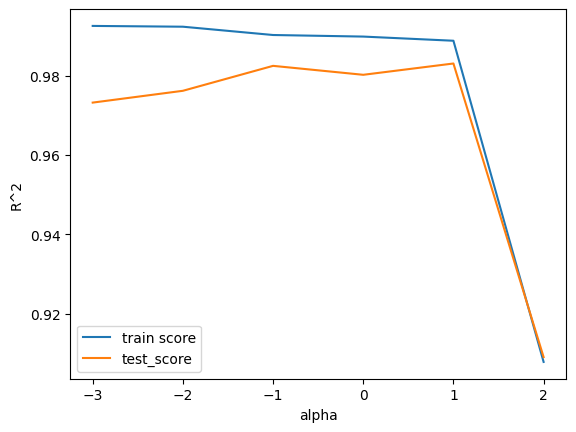

In [ ]:
# 그래프
plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

- alpha = 10^2일 때, 두 점수가 급격하게 떨어지는 것을 보면 underfitting 되었다고 해석할 수 있다.
- alpha = 10^1일 때, train set과 test set이 가장 가까우므로 여기서 최적의 alpha 값은 10이 된다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print("lasso train set score:", lasso.score(train_scaled, train_target))
print("lasso test set score:", lasso.score(test_scaled, test_target))

lasso train set score: 0.9888067471131867
lasso test set score: 0.9824470598706695


- 릿지 모델과 마찬가지로 overfitting을 잘 억제하고 test set의 성능을 크게 높였다.

In [ ]:
print(np.sum(lasso.coef_ == 0))

40


- 라쏘 모델의 경우 계수 값을 0으로 만들 수 있다.
- 라쏘 모델의 계수는 coef_ 속성에 저장되어 있다.
계수가 0인 것을 찾아보면 55개의 특성 중 40개가 0에 해당하는 것을 알 수 있다. 이런 특징을 바탕으로 라쏘 모델은 유용한 특성을 골라내는 데 사용된다.
- np.sum() 함수 : 배열을 모두 더한 값을 반환한다.